## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from collections import defaultdict
from scipy.stats import linregress

import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on = 'Mouse ID', how='outer')


In [2]:
# Checking the total number of mice.
mice_number = mouse_study['Mouse ID'].count()
mice_number


1893

In [3]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_dup = mouse_study[mouse_study.duplicated(['Mouse ID', 'Timepoint'])]
mouse_dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#drops duplicates but doesn't drop all data required
#mouse_study_clean = mouse_study.drop_duplicates(subset=["Mouse ID", "Timepoint"])
#drops all data from mouse ID g989
mouse_study.drop(mouse_study[mouse_study['Mouse ID']== 'g989'].index, inplace=True)

In [5]:
# Checking the number of mice in the clean DataFrame.
total_mouse = mouse_study['Mouse ID'].count()
total_unique = mouse_study['Mouse ID'].nunique()
#Print unique mice and total mice
print(str(total_mouse) + '\n' + str(total_unique))

1880
248


## Summary Statistics

In [6]:
#Groups data by Drug name and gets various stats for it
mouse_stats = mouse_study.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean','median', 'var', 'std', 'sem']}).round(2)
#evens column level
mouse_stats.columns = ['_'.join(col) for col in mouse_stats.columns.values]

mouse_stats


,Tumor Volume (mm3)_mean,Tumor Volume (mm3)_median,Tumor Volume (mm3)_var,Tumor Volume (mm3)_std,Tumor Volume (mm3)_sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

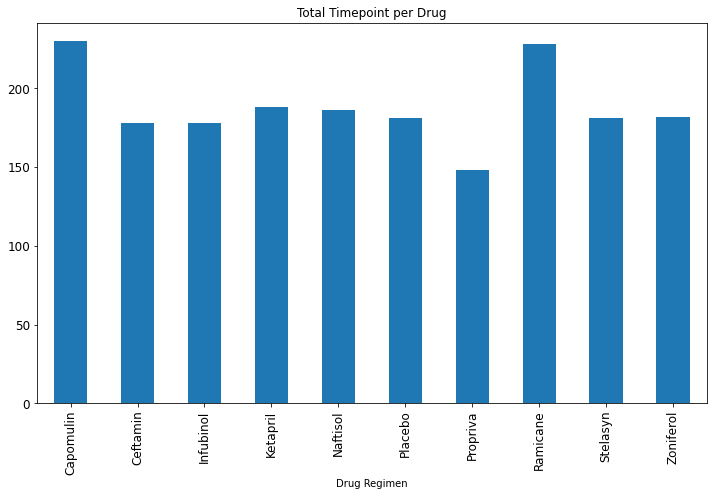

In [7]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#Gets total number of time points per Drug
mouse_bar = mouse_study.groupby('Drug Regimen').count()['Timepoint']
mouse_bar_df = pd.DataFrame(mouse_bar)
#bar plot
ax = mouse_bar_df.plot(kind='bar', title ="Total Timepoint per Drug", figsize=(12, 7), legend=False, fontsize=12)


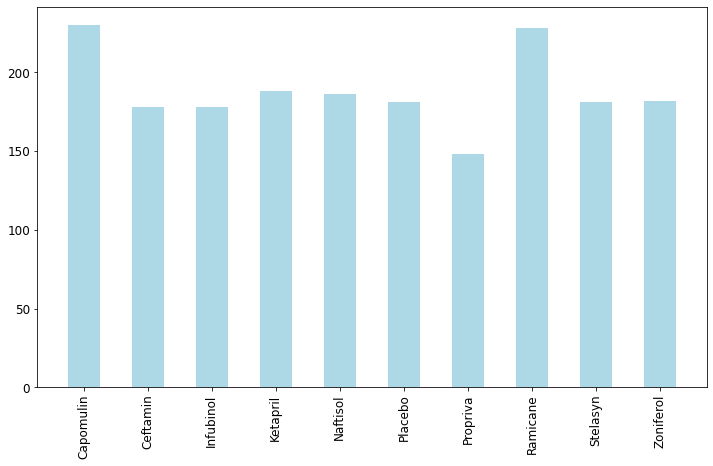

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

mouse_plot_df = pd.DataFrame(mouse_bar)
#Resets index because the drugname being the index throws an error
mouse_plot_df.reset_index(inplace = True)

#changes font
plt.rcParams.update({'font.size': 12})
#gets total number of Drugs
x_axis = np.arange(len(mouse_plot_df))
#assigns drug name to tick values
tick_locations = [value for value in x_axis]

#Sets figure
plt.figure(figsize=(12,7))
plt.bar(x_axis, mouse_plot_df['Timepoint'], color='lightblue', width = 0.5, alpha = 1)
plt.xticks(tick_locations, mouse_plot_df['Drug Regimen'], rotation="vertical")

plt.show()

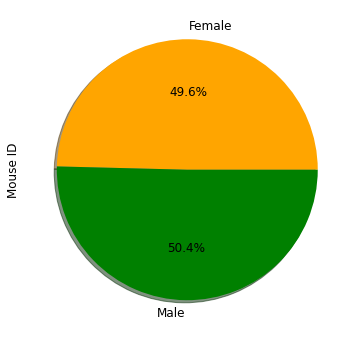

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#gets number of unique male and femal mice
mouse_gender = mouse_study.groupby(['Sex'])['Mouse ID'].nunique()
#converts to dataframe
mouse_gender_df = pd.DataFrame(mouse_gender)
#converts to pie chart using pandas plot
plot = mouse_gender.plot.pie(subplots =True, figsize=(11, 6), fontsize = 12, autopct='%1.1f%%', shadow = True, colors = ['orange', 'green'])

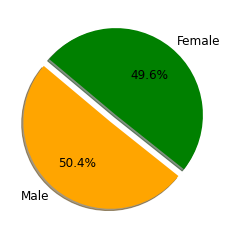

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot\
#Hard code values because pie charts by nature have small datasets
labels = ['Male', 'Female']
sizes = [125, 123]
colors = ['orange', 'green']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_time = mouse_study.groupby('Mouse ID')['Timepoint'].max()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timepoint_df = pd.merge(mouse_study, last_time, on = 'Mouse ID', how='outer')

timepoint_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [12]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_list = []
tumor_dict = {}

for drug in drug_list:
    #gets all rows where drug matches drug list
    temp = timepoint_df.loc[timepoint_df['Drug Regimen']== drug]
    #further filters, grabs last time point
    ft_data = temp.loc[temp['Timepoint_x'] == temp['Timepoint_y']]
    #gets tumor vol data into a series and then
    tumor_vol = ft_data['Tumor Volume (mm3)']
    tumor_list = tumor_vol.tolist()
    
    #get quartile data
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = (upperq-lowerq).round(2)
    
    #output quartile data
    print(f"The lower quartile of {drug} is {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5].round(2)} ")
    
    #get bound data
    lower_bound = (lowerq - (1.5*iqr)).round(2)
    upper_bound = (upperq + (1.5*iqr)).round(2)
    print("---------------------------------------------")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    #filter tumor vol data based bounds and count any matches
    outliers = tumor_vol.loc[(ft_data['Tumor Volume (mm3)'] <= lower_bound) | (ft_data['Tumor Volume (mm3)'] >= upper_bound)].count()
    print(f"Number of {drug} outliers: {outliers}")
    print("\n")
    
    #Add key as drug name to dictionary, then append list data
    if drug not in tumor_dict:
        tumor_dict[drug] = tumor_list
    else:
         tumor_dict[drug].append(tumor_list)

The lower quartile of Capomulin is 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.13 
---------------------------------------------
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.
Number of Capomulin outliers: 0


The lower quartile of Ramicane is 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
---------------------------------------------
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
Number of Ramicane outliers: 0


The lower quartile of Infubinol is 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.17 
---------------------------------------------
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.
Number of Infubinol outliers: 1


The lower quartile of Ceftamin is

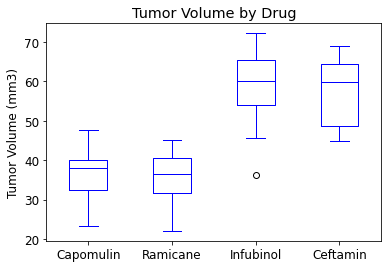

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#conver dict to dataframe
tmv_df=pd.DataFrame.from_dict(tumor_dict, orient ='index').transpose()
#generate boxplot
tmv_df.boxplot(grid=False, color ='b')
plt.title('Tumor Volume by Drug')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], drug_list)
plt.show()

## Line and Scatter Plots

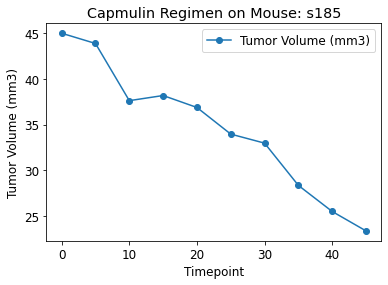

In [14]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Get all mice treated with capomulin
cap_mouse = timepoint_df.loc[timepoint_df['Drug Regimen']== 'Capomulin']
#return all unique mouse IDs in array
uniq_m = cap_mouse['Mouse ID'].unique()
#get df for mouse in array
uniq_m_df = cap_mouse.loc[cap_mouse['Mouse ID']== uniq_m[0]]
#generate plot
title = f'Capmulin Regimen on Mouse: {uniq_m[0]}'
ax1 = uniq_m_df.plot(x ='Timepoint_x', y ='Tumor Volume (mm3)', title = title, marker = 'o')
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xlabel('Timepoint')

plt.show()

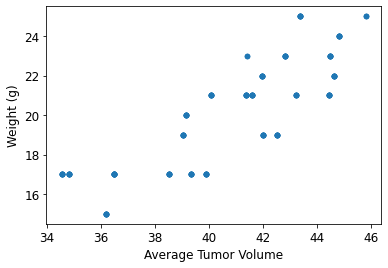

In [15]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#get series containg average tumor volume for each unique mouse
avg_tv = cap_mouse.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
avg_tv = avg_tv.to_frame()
#merge to full data frame
cap_mouse_merge = pd.merge(cap_mouse, avg_tv, on = 'Mouse ID', how='outer')
#create scatter plot based on merged frame
cap_mouse_merge.plot(kind = 'scatter', x = 'Tumor Volume (mm3)_y', y = 'Weight (g)')
plt.xlabel('Average Tumor Volume')
plt.show()

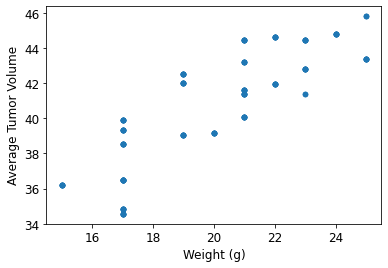

In [16]:
#generate plot with different x,y values
cap_mouse_merge.plot(kind = 'scatter', y = 'Tumor Volume (mm3)_y', x = 'Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.show()

## Correlation and Regression

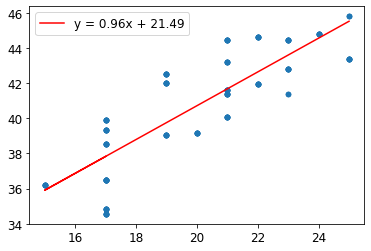

The correlation coefficient between mouse weight and Average Tumor Volume is 0.83


In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
y_values = cap_mouse_merge['Tumor Volume (mm3)_y']
x_values = cap_mouse_merge['Weight (g)']

#generate linear regression stats using linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#get line eaution
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#generate plot
plt.plot(x_values,regress_values,"r-", label = line_eq)
plt.scatter(x_values,y_values, s = 20)
plt.legend(loc='upper left')
plt.show()
#use pearsonr lib to get corr coeeficient
print(f"The correlation coefficient between mouse weight and Average Tumor Volume is {round(st.pearsonr(x_values,y_values)[0],2)}")

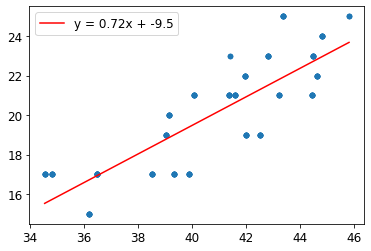

The correlation coefficient between Average Tumor Volume and mouse weight is 0.83


In [18]:
#Same as above, x and y values are flipped
x_values = cap_mouse_merge['Tumor Volume (mm3)_y']
y_values = cap_mouse_merge['Weight (g)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-", label = line_eq)
plt.scatter(x_values,y_values, s = 20)
plt.legend(loc='upper left')
plt.show()

print(f"The correlation coefficient between Average Tumor Volume and mouse weight is {round(st.pearsonr(x_values,y_values)[0],2)}")